___
### <center> <u> <h1> <strong> Transformée de Fourrier et Spectre de Fréquences </strong> </h1> </center>

<h3>
Dans ce notebook on verra en détails des exemples sur comment :
    
<strong> 

- Construire un signal

- Représenter ce signal

- Éffectuer une Transformée de Fourrier

- Faire un spectre de fréquences
    
- Faire le spectre de phase du signal
    
- Automatiser le procédé à l'aide d'un Objet personalisé en Python
    </strong>
</h3>
---

<h2> <strong> 1 - Importation des modules necessaires

In [1]:
import numpy as np
import matplotlib.pyplot as plt

<h2> <strong> 2 - Construction du signal </strong> </h2>

- ###  <strong>  Dans un premier temps nous allons définir les paramètres du signal

In [2]:
#  Fréquence et période du signal
Fs = 300.
Ts = 1/Fs

# Fréquence maximale dans l'espace des fréquence
F_max = 7*Fs

# Plus petit intervall de temps
t_step = 0.005*Ts

# Durée du signal
duration = 3*Ts

# Nombre d'échantillons en temps; discrétisation
N = int(duration/t_step)

# Étendue temporelle du signal : échantillon du temps sur toute sa durée 
t = np.linspace( 0 , duration , N )

# Échantillonage en fréquence
f  = np.fft.fftfreq(N, t[1])

- ###  <strong> Définition du Signal

In [3]:
signal = np.sin( 2*np.pi*Fs*t )

<h2> <strong> 3 - Représentation graphique du signal  </strong> </h2>

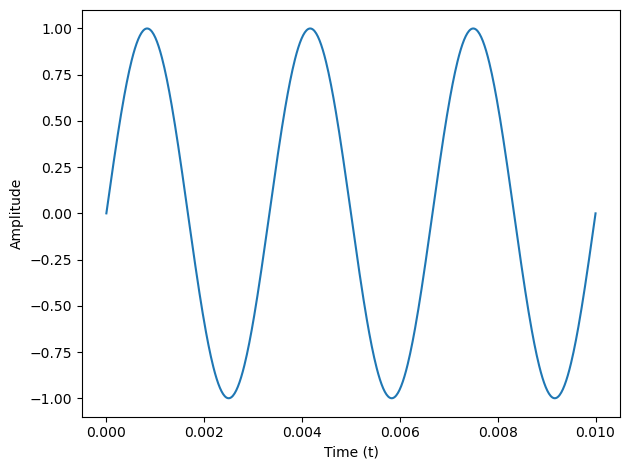

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.plot(t, signal)
ax.set_xlabel("Time (t)")
ax.set_ylabel("Amplitude")
plt.tight_layout()

<h2> <strong> 4 - Transformée de fourrier rapide FFT  </strong> </h2>

- ###  <strong> Transformée

In [5]:
FFT = np.fft.fft(signal)

- ### Taille initiale

In [6]:
print(FFT.size)

600


- ###  <strong> Filtrage sur les fréquences en dessous du seuil de fréquences maximum qu'on s'est imposé

In [7]:
filtre = np.abs(f) <= F_max
FFT = FFT[filtre]

f = f[filtre]

In [8]:
np.abs

<ufunc 'absolute'>

- ###  <strong> Taille

In [9]:
print(FFT.size)

43


- ### Type de données

la transformée de Fourier est à valeur complexes

In [10]:
FFT[:10]

array([ 8.33708103e-15  +0.j        ,  1.95924548e-03  -0.3741849j ,
        1.25110564e-02  -1.19467421j,  4.70807018e+00-299.70040469j,
       -3.61160591e-02  +1.72416266j, -2.46289335e-02  +0.94054102j,
       -2.10005774e-02  +0.66824921j, -1.92872905e-02  +0.52599308j,
       -1.83173780e-02  +0.4370394j , -1.77068966e-02  +0.37547383j])

- ### Retenons les Amplitudes de ces nombres complexes

In [11]:
FFT_mag = np.abs(FFT)
FFT_arg = np.angle(FFT, deg=True)
print(FFT_mag[:20])

[8.33708103e-15 3.74190034e-01 1.19473972e+00 2.99737383e+02
 1.72454088e+00 9.40863434e-01 6.68579112e-01 5.26346574e-01
 4.37423094e-01 3.75891121e-01 3.30453598e-01 2.95352944e-01
 2.67325201e-01 2.44371358e-01 2.25193150e-01 2.08907702e-01
 1.94891964e-01 1.82692654e-01 1.71971493e-01 1.62470518e-01]


In [12]:
print(FFT_arg[:20])

[  0.  -89.7 -89.4 -89.1  91.2  91.5  91.8  92.1  92.4  92.7  93.   93.3
  93.6  93.9  94.2  94.5  94.8  95.1  95.4  95.7]


In [13]:
f[:20]

array([   0.        ,   99.83333333,  199.66666667,  299.5       ,
        399.33333333,  499.16666667,  599.        ,  698.83333333,
        798.66666667,  898.5       ,  998.33333333, 1098.16666667,
       1198.        , 1297.83333333, 1397.66666667, 1497.5       ,
       1597.33333333, 1697.16666667, 1797.        , 1896.83333333])

- ###  <strong> Normalisation

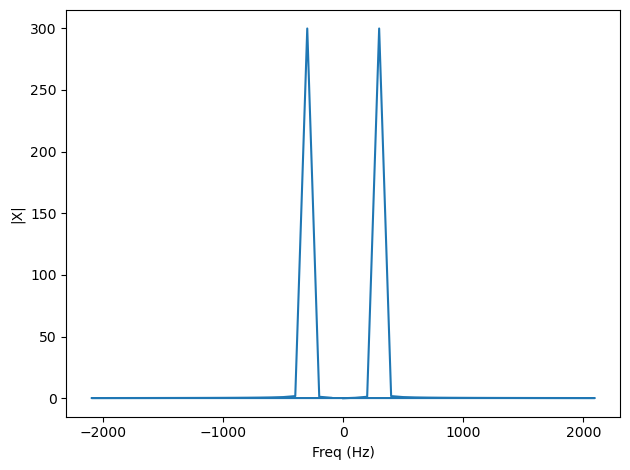

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.plot(f, FFT_mag)
ax.set_xlabel("Freq (Hz)")
ax.set_ylabel("|X|")
plt.tight_layout()

- ###  <strong> Double fréquence

<h3> Comme on peut le voir sur le graph précédant, la transformée  de fourrier est faite aussi bien sur les <strong> fréquences positives que les fréquences négatives </strong>

Éliminons donc les fréquences négatives pour ne conserver que les positives

In [15]:
N = f.size

f_pos = f[:N//2]
FFT_mag_pos = FFT_mag[:N//2]
FFT_arg_pos = FFT_arg[:N//2]

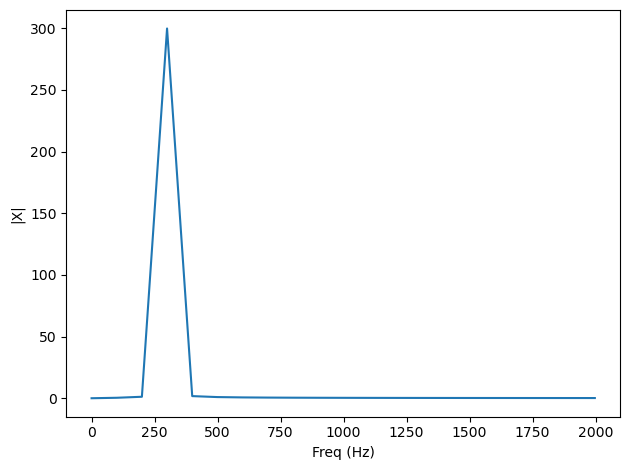

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.plot(f_pos, FFT_mag_pos)
ax.set_xlabel("Freq (Hz)")
ax.set_ylabel("|X|")
plt.tight_layout()

- ###  <strong> Spectre de Phase

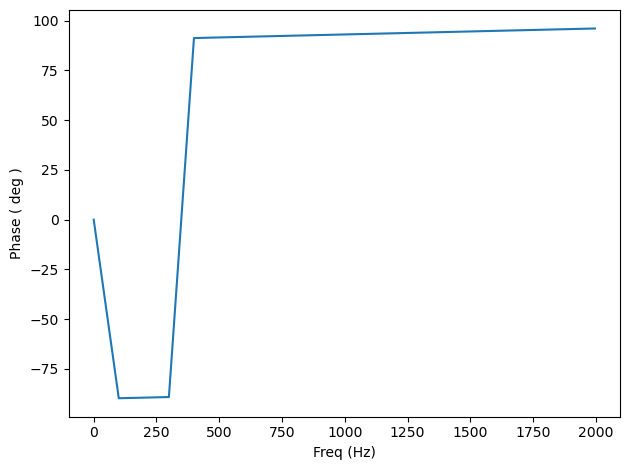

In [17]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.plot(f_pos, FFT_arg_pos)
ax.set_xlabel("Freq (Hz)")
ax.set_ylabel("Phase ( deg )")
plt.tight_layout()

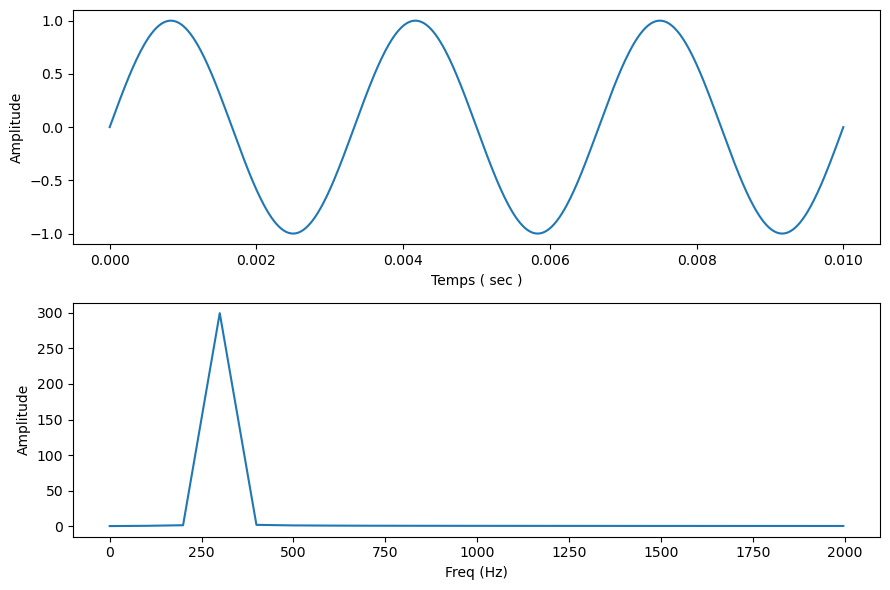

In [18]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize= (9,6))

ax1.plot(t, signal)
ax1.set_xlabel("Temps ( sec )")
ax1.set_ylabel("Amplitude")

ax2.plot(f_pos, FFT_mag_pos)
ax2.set_xlabel("Freq (Hz)")
ax2.set_ylabel("Amplitude")

plt.tight_layout()

<h2> <strong> 4 - Aller plus loin : Combinaison de signaux et signal spécifique  </strong> </h2>

- ###  <strong> Signaux additionés

### Le signal suivant est de la forme : `Sin(2pi100t) + Sin(2pi200t) + Sin(2pi300t) + Sin(2pi400t) + Sin(2pi500t)`

In [19]:
####################################################################################
#####################     Fréquences et période des signaux     ####################
####################################################################################
Fs = np.array([100, 200, 300, 400, 500])
Ts = 1/Fs

####################################################################################
#################  Fréquence maximale dans l'espace des fréquence   ################
####################################################################################
F_max = max( 15*Fs.min(), Fs.max() + 5*Fs.min() )

####################################################################################
#########################  Plus petit intervall de temps    ########################
####################################################################################
t_step = 0.001*Ts.min()

####################################################################################
############################  Durée du signal   ####################################
####################################################################################
duration = 8*Ts.max()

####################################################################################
################   Nombre d'échantillons en temps; discrétisation   ################
####################################################################################
N = int(duration/t_step)

####################################################################################
#### Étendue temporelle du signal : échantillon du temps sur toute sa durée   ######
####################################################################################
t = np.linspace( 0 , duration , N )

####################################################################################
########################    Échantillonage en fréquence     ########################
####################################################################################
f  = np.fft.fftfreq(N, t[1])

In [20]:
###########################################################################
######################     Signal à transformer      ######################
###########################################################################
signal = 0
for freq in Fs :
    signal += np.sin( 2*np.pi*freq*t )

###########################################################################
######################     Transformée du signal     ######################
###########################################################################
FFT = np.fft.fft(signal)

###########################################################################
####### Réduction du résultat en dessous d'une fréquence maximale  ########
###########################################################################
filtre = np.abs(f) <= F_max
FFT = FFT[filtre]
f = f[filtre]

###########################################################################
######################       Module et argument      ######################
###########################################################################
FFT_mag = np.abs(FFT)
FFT_arg = np.angle(FFT, deg=True)

###########################################################################
###################   Suppression des fréquences négatives  ###############
###########################################################################
N = f.size
f_pos = f[:N//2]
FFT_mag_pos = FFT_mag[:N//2]
FFT_arg_pos = FFT_arg[:N//2]

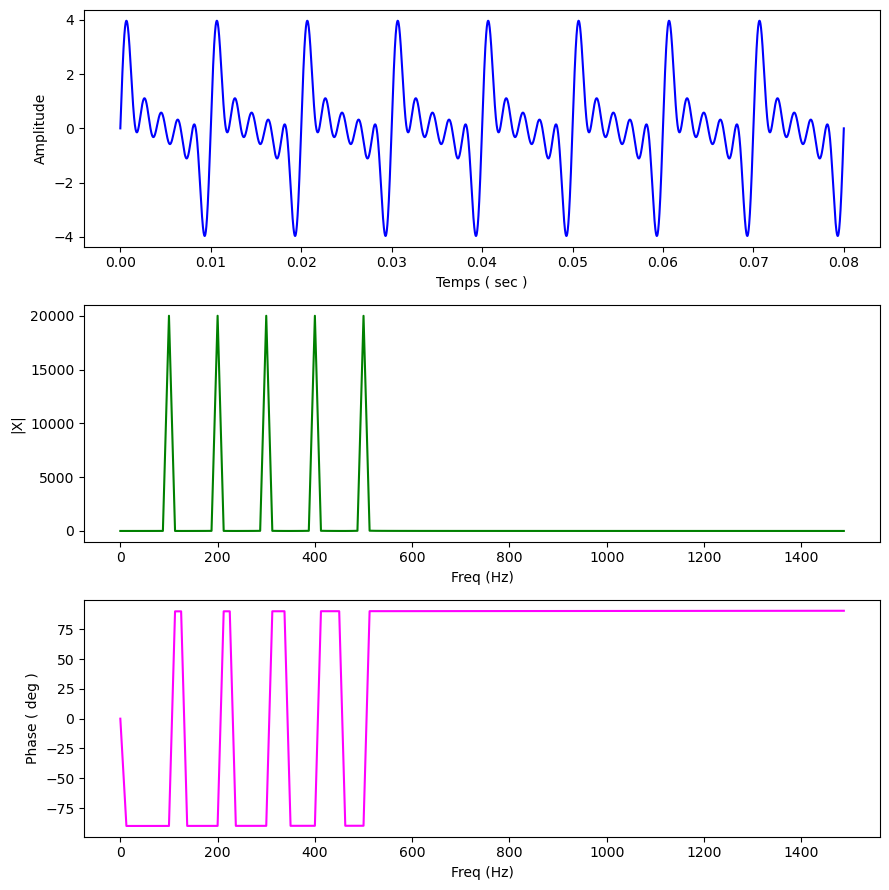

In [21]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize= (9,9))


###########################################################################
###################           Affichage du signal           ###############
###########################################################################
ax1.plot(t, signal, color= 'blue')
ax1.set_xlabel("Temps ( sec )")
ax1.set_ylabel("Amplitude")


###########################################################################
###################     Affichage du spectre en fréquence   ###############
###########################################################################
ax2.plot(f_pos, FFT_mag_pos, color="green")
ax2.set_xlabel("Freq (Hz)")
ax2.set_ylabel("|X|")


###########################################################################
###################      Affichage du spectre de phase      ###############
###########################################################################
ax3.plot(f_pos, FFT_arg_pos, color="magenta")
ax3.set_xlabel("Freq (Hz)")
ax3.set_ylabel("Phase ( deg )")

plt.tight_layout()

### On vois bien qu'il y a 5 pics caractéristiques correspondants aux 5 fréquences additionnées plus haut

- ###  <strong> Multiplication de signaux

### Le signal suivant est de la forme : `Sin(2pi100t) x Sin(2pi200t) x Sin(2pi300t) x Sin(2pi400t) x Sin(2pi500t)`

In [22]:
####################################################################################
#####################     Fréquences et période des signaux     ####################
####################################################################################
Fs = np.array([100, 200, 300, 400, 500])
Ts = 1/Fs

####################################################################################
#################  Fréquence maximale dans l'espace des fréquence   ################
####################################################################################
F_max = max( 15*Fs.min(), Fs.max() + 5*Fs.min() )*np.sqrt(Fs.size)

####################################################################################
#########################  Plus petit intervall de temps    ########################
####################################################################################
t_step = 0.001*Ts.min()

####################################################################################
############################  Durée du signal   ####################################
####################################################################################
duration = 8*Ts.max()

####################################################################################
################   Nombre d'échantillons en temps; discrétisation   ################
####################################################################################
N = int(duration/t_step)

####################################################################################
#### Étendue temporelle du signal : échantillon du temps sur toute sa durée   ######
####################################################################################
t = np.linspace( 0 , duration , N )

####################################################################################
########################    Échantillonage en fréquence     ########################
####################################################################################
f  = np.fft.fftfreq(N, t[1])

In [23]:
###########################################################################
######################     Signal à transformer      ######################
###########################################################################
signal = 1
for freq in Fs :
    signal *= np.sin( 2*np.pi*freq*t )

###########################################################################
######################     Transformée du signal     ######################
###########################################################################
FFT = np.fft.fft(signal)

###########################################################################
####### Réduction du résultat en dessous d'une fréquence maximale  ########
###########################################################################
filtre = np.abs(f) <= F_max
FFT = FFT[filtre]
f = f[filtre]

###########################################################################
######################       Module et argument      ######################
###########################################################################
FFT_mag = np.abs(FFT)
FFT_arg = np.angle(FFT, deg=True)

###########################################################################
###################   Suppression des fréquences négatives  ###############
###########################################################################
N = f.size
f_pos = f[:N//2]
FFT_mag_pos = FFT_mag[:N//2]
FFT_arg_pos = FFT_arg[:N//2]

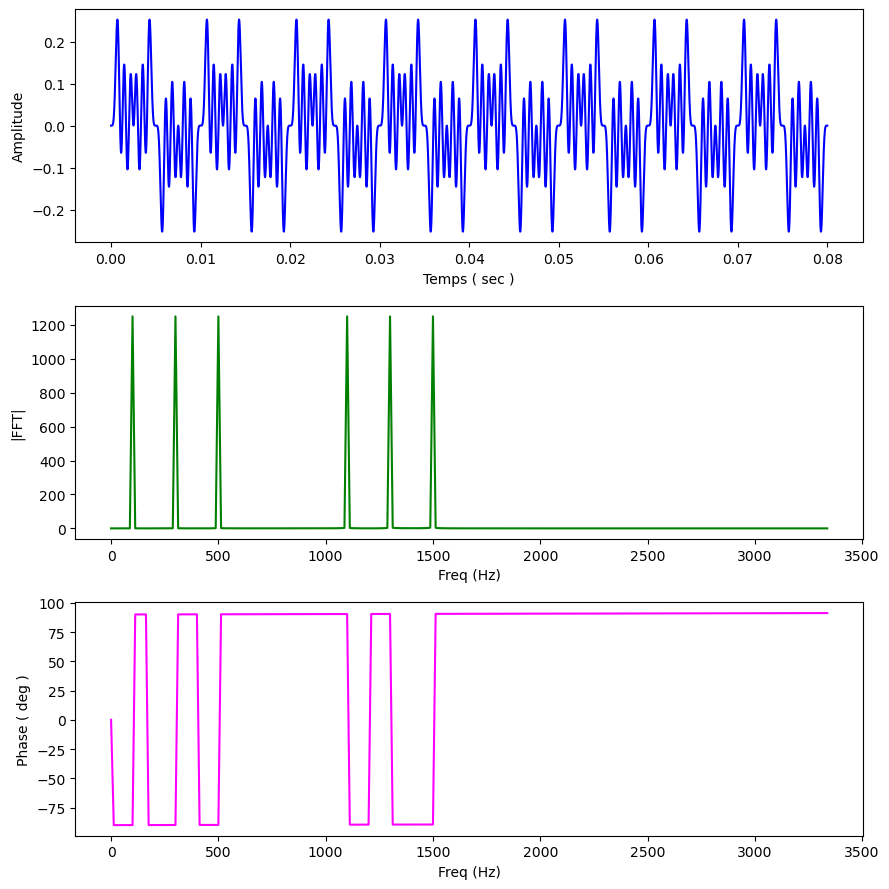

In [24]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize= (9,9))


###########################################################################
###################           Affichage du signal           ###############
###########################################################################
ax1.plot(t, signal, color= 'blue')
ax1.set_xlabel("Temps ( sec )")
ax1.set_ylabel("Amplitude")


###########################################################################
###################     Affichage du spectre en fréquence   ###############
###########################################################################
ax2.plot(f_pos, FFT_mag_pos, color="green")
ax2.set_xlabel("Freq (Hz)")
ax2.set_ylabel("|FFT|")


###########################################################################
###################      Affichage du spectre de phase      ###############
###########################################################################
ax3.plot(f_pos, FFT_arg_pos, color="magenta")
ax3.set_xlabel("Freq (Hz)")
ax3.set_ylabel("Phase ( deg )")

plt.tight_layout()

- ###  <strong> Signal en dent de scie

In [25]:
####################################################################################
#####################     Fréquences et période des signaux     ####################
####################################################################################
Fs = 100
Ts = 1/Fs

####################################################################################
#################  Fréquence maximale dans l'espace des fréquence   ################
####################################################################################
F_max = 15*Fs

####################################################################################
#########################  Plus petit intervall de temps    ########################
####################################################################################
t_step = 0.001*Ts

####################################################################################
############################  Durée du signal   ####################################
####################################################################################
duration = 8*Ts

####################################################################################
################   Nombre d'échantillons en temps; discrétisation   ################
####################################################################################
N = int(duration/t_step)

####################################################################################
#### Étendue temporelle du signal : échantillon du temps sur toute sa durée   ######
####################################################################################
t = np.linspace( 0 , duration , N )

####################################################################################
########################    Échantillonage en fréquence     ########################
####################################################################################
f  = np.fft.fftfreq(N, t[1])

In [26]:
###########################################################################
######################     Signal à transformer      ######################
###########################################################################
signal = t%Ts

###########################################################################
######################     Transformée du signal     ######################
###########################################################################
FFT = np.fft.fft(signal)

###########################################################################
####### Réduction du résultat en dessous d'une fréquence maximale  ########
###########################################################################
filtre = np.abs(f) <= F_max
FFT = FFT[filtre]
f = f[filtre]

###########################################################################
######################       Module et argument      ######################
###########################################################################
FFT_mag = np.abs(FFT)
FFT_arg = np.angle(FFT, deg=True)

###########################################################################
###################   Suppression des fréquences négatives  ###############
###########################################################################
N = f.size
f_pos = f[:N//2]
FFT_mag_pos = FFT_mag[:N//2]
FFT_arg_pos = FFT_arg[:N//2]

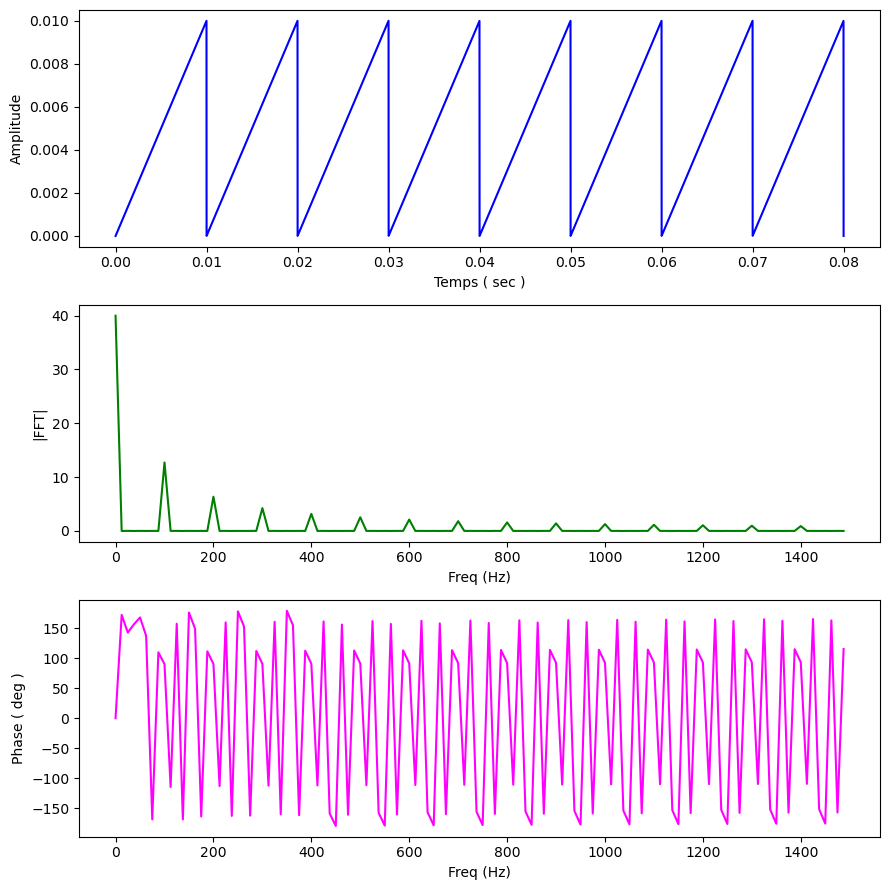

In [27]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize= (9,9))


###########################################################################
###################           Affichage du signal           ###############
###########################################################################
ax1.plot(t, signal, color= 'blue')
ax1.set_xlabel("Temps ( sec )")
ax1.set_ylabel("Amplitude")


###########################################################################
###################     Affichage du spectre en fréquence   ###############
###########################################################################
ax2.plot(f_pos, FFT_mag_pos, color="green")
ax2.set_xlabel("Freq (Hz)")
ax2.set_ylabel("|FFT|")


###########################################################################
###################      Affichage du spectre de phase      ###############
###########################################################################
ax3.plot(f_pos, FFT_arg_pos, color="magenta")
ax3.set_xlabel("Freq (Hz)")
ax3.set_ylabel("Phase ( deg )")

plt.tight_layout()

- ###  <strong> Signal Carré

In [28]:
####################################################################################
#####################     Fréquences et période des signaux     ####################
####################################################################################
Fs = 100
Ts = 1/Fs

####################################################################################
#################  Fréquence maximale dans l'espace des fréquence   ################
####################################################################################
F_max = 15*Fs

####################################################################################
#########################  Plus petit intervall de temps    ########################
####################################################################################
t_step = 0.001*Ts

####################################################################################
############################  Durée du signal   ####################################
####################################################################################
duration = 8*Ts

####################################################################################
################   Nombre d'échantillons en temps; discrétisation   ################
####################################################################################
N = int(duration/t_step)

####################################################################################
#### Étendue temporelle du signal : échantillon du temps sur toute sa durée   ######
####################################################################################
t = np.linspace( 0 , duration , N )

####################################################################################
########################    Échantillonage en fréquence     ########################
####################################################################################
f  = np.fft.fftfreq(N, t[1])

In [29]:
###########################################################################
######################     Signal à transformer      ######################
###########################################################################
signal = t%Ts > Ts/2

###########################################################################
######################     Transformée du signal     ######################
###########################################################################
FFT = np.fft.fft(signal)

###########################################################################
####### Réduction du résultat en dessous d'une fréquence maximale  ########
###########################################################################
filtre = np.abs(f) <= F_max
FFT = FFT[filtre]
f = f[filtre]

###########################################################################
######################       Module et argument      ######################
###########################################################################
FFT_mag = np.abs(FFT)
FFT_arg = np.angle(FFT, deg=True)

###########################################################################
###################   Suppression des fréquences négatives  ###############
###########################################################################
N = f.size
f_pos = f[:N//2]
FFT_mag_pos = FFT_mag[:N//2]
FFT_arg_pos = FFT_arg[:N//2]

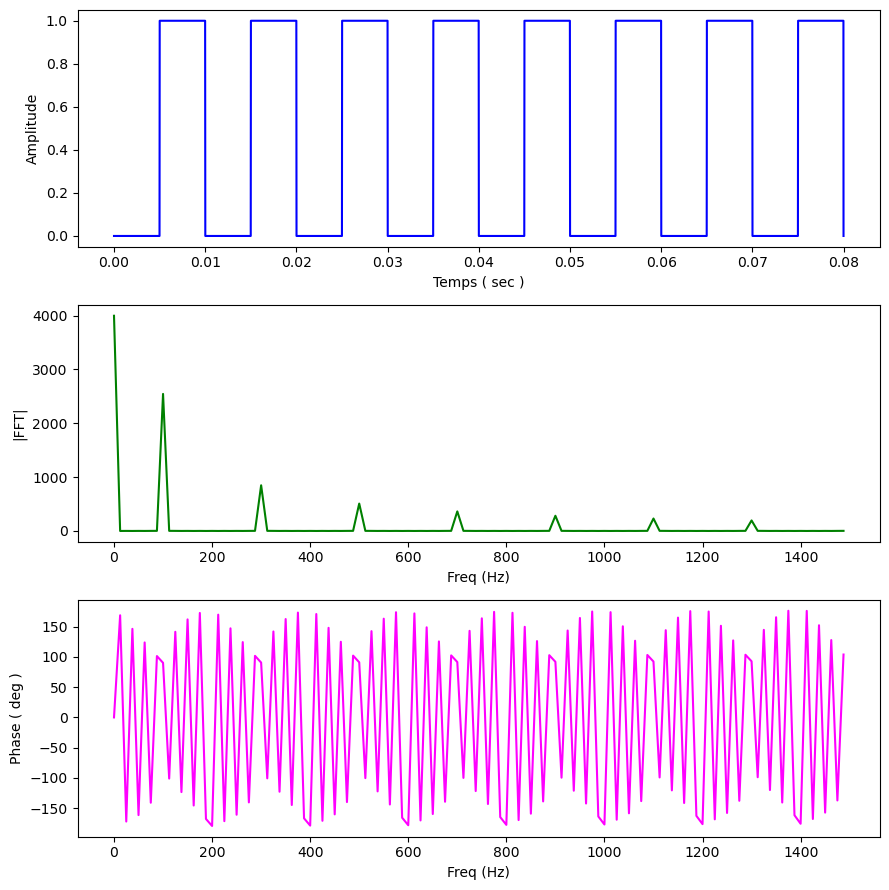

In [30]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize= (9,9))


###########################################################################
###################           Affichage du signal           ###############
###########################################################################
ax1.plot(t, signal, color= 'blue')
ax1.set_xlabel("Temps ( sec )")
ax1.set_ylabel("Amplitude")


###########################################################################
###################     Affichage du spectre en fréquence   ###############
###########################################################################
ax2.plot(f_pos, FFT_mag_pos, color="green")
ax2.set_xlabel("Freq (Hz)")
ax2.set_ylabel("|FFT|")


###########################################################################
###################      Affichage du spectre de phase      ###############
###########################################################################
ax3.plot(f_pos, FFT_arg_pos, color="magenta")
ax3.set_xlabel("Freq (Hz)")
ax3.set_ylabel("Phase ( deg )")

plt.tight_layout()

- ### <strong> Signal prériodique quelconque

Le signal qui sera employé ici sera un signal périodique semi-exponentiel

In [31]:
####################################################################################
#####################     Fréquences et période des signaux     ####################
####################################################################################
Fs = 100
Ts = 1/Fs

####################################################################################
#################  Fréquence maximale dans l'espace des fréquence   ################
####################################################################################
F_max = 15*Fs

####################################################################################
#########################  Plus petit intervall de temps    ########################
####################################################################################
t_step = 0.001*Ts

####################################################################################
############################  Durée du signal   ####################################
####################################################################################
duration = 8*Ts

####################################################################################
################   Nombre d'échantillons en temps; discrétisation   ################
####################################################################################
N = int( duration/t_step )

####################################################################################
#### Étendue temporelle du signal : échantillon du temps sur toute sa durée   ######
####################################################################################
t = np.linspace( 0 , duration , N )

####################################################################################
########################    Échantillonage en fréquence     ########################
####################################################################################
f  = np.fft.fftfreq( N, t[1] )

In [32]:
###########################################################################
######################     Signal à transformer      ######################
###########################################################################
signal = np.exp(-3*Fs*(t%Ts) )

###########################################################################
######################     Transformée du signal     ######################
###########################################################################
FFT = np.fft.fft(signal)

###########################################################################
####### Réduction du résultat en dessous d'une fréquence maximale  ########
###########################################################################
filtre = np.abs(f) <= F_max
FFT = FFT[filtre]
f = f[filtre]

###########################################################################
######################       Module et argument      ######################
###########################################################################
FFT_mag = np.abs(FFT)
FFT_arg = np.angle(FFT, deg=True)

###########################################################################
###################   Suppression des fréquences négatives  ###############
###########################################################################
N = f.size
f_pos = f[:N//2]
FFT_mag_pos = FFT_mag[:N//2]
FFT_arg_pos = FFT_arg[:N//2]

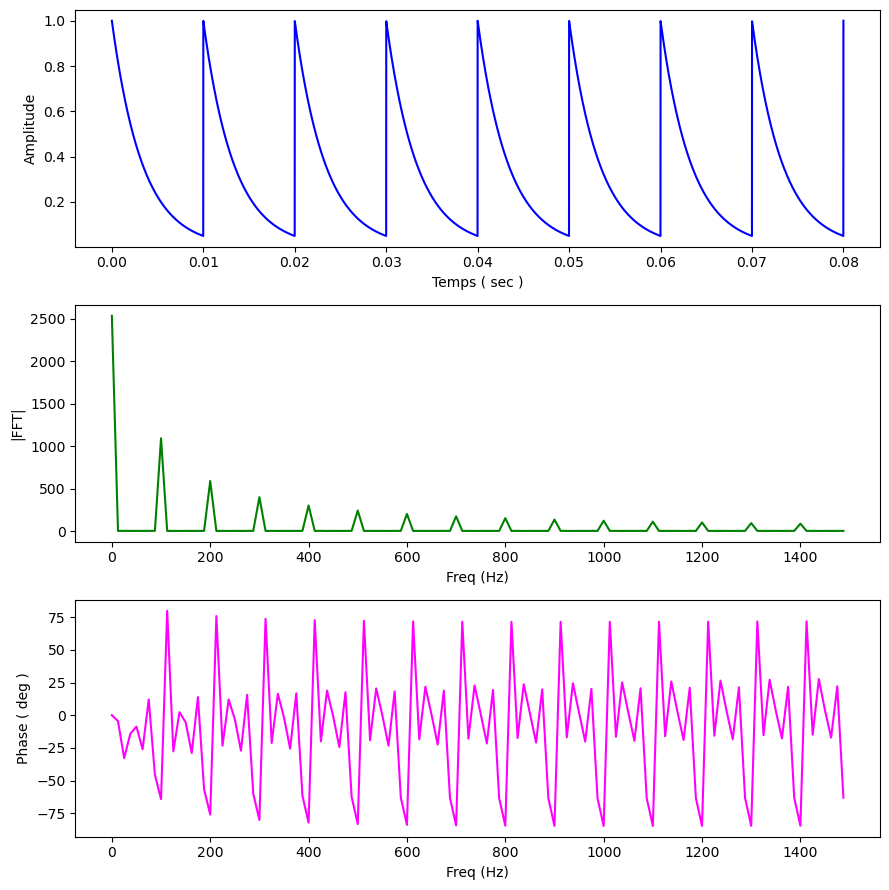

In [33]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize= (9,9))

###########################################################################
###################           Affichage du signal           ###############
###########################################################################
ax1.plot(t, signal, color= 'blue')
ax1.set_xlabel("Temps ( sec )")
ax1.set_ylabel("Amplitude")

###########################################################################
###################     Affichage du spectre en fréquence   ###############
###########################################################################
ax2.plot(f_pos, FFT_mag_pos, color="green")
ax2.set_xlabel("Freq (Hz)")
ax2.set_ylabel("|FFT|")

###########################################################################
###################      Affichage du spectre de phase      ###############
###########################################################################
ax3.plot(f_pos, FFT_arg_pos, color="magenta")
ax3.set_xlabel("Freq (Hz)")
ax3.set_ylabel("Phase ( deg )")

plt.tight_layout()

In [34]:
Fs = "100*300 900".split(" ")
for i in range( len( Fs ) ) :
    Fs.insert( i , np.array([ float(j) for j in Fs[i].split("*") ]) )
    del Fs[i+1]
Fs = np.array(Fs, dtype=object)
x  = map( lambda x : x/2, Fs)
y  = map( lambda x : x*5, x)

np.array([i for i in y], dtype=object)

array([array([250., 750.]), array([2250.])], dtype=object)

<h2> <strong> 5 - Automatisation à l'aide d'une classe Python  </strong> </h2>

In [35]:
class Fourrier_Transform(  ):
    N_instances = 0

    def __init__( self, frequences = None, function = None ) :
        """
        DESCRIPTION : 
        ------------
            Constructeur de la classe qui defini et construit les variables pertinentes
        
        PARAMETRES : 
        -----------
            - Frequences : String or Numpy Array
                Variable contenant les fréquences. Pour utiliser un seul signal harmonique de fréquence 200 Hz, la variable peut prendre la valeur "200".
                Si par contre on désire supperposer deux signaux harmoniques de fréquences 100 et 200 Hz elle prends la valeur "100 200"; l'espace laissé entre les
                deux valeurs signfie qu'il y a addition des signaux. Si par contre il faut multiplier les signaux alors donner la valeur "100*200" et plus 
                généralement s'il faut utiliser un signal résultat de l'addition d'une multiplication de signaux il faut envoyer les valeurs
                sous la forme "100*60 300"; ce qui signifie que le signal résulte de la multiplication de deux signaux harmoniques de fréquence 100 et 60 Hz puis
                additionné à un signal de fréquence 300 Hz.
                    
            - function: func or str
                Lambda fonction à employer comme noyau à la fonction périodique si on ne voudrait pas utiliser de fonction harmonique. laisser la valeur par defaut `None`
                dans le cas contraire. En combinant diverses valeurs des variables `frequences` et `function` il est possible de construire différents types de signaux 
                périodiques. On peut lui attribuer les valeurs "carré", "triangle", "neg_exp" et "pos_exp" pour les fonctions associées carré, dent de scie et expo.
                    
        OUTPUT :  None
        ------- 
        
        AUTHOR : 
        --------
            BRICE KENGNI ZANGUIM
            kenzabri2@yahoo.com
        
        """
        self.function = function
        ####################################################################################
        #####################     Fréquences et périodes des signaux     ###################
        ####################################################################################
        if frequences : 
            if isinstance( frequences, str) :
                Fs = self.remove_blank_space(frequences).split(" ")
                for i in range( len( Fs ) ) :
                    Fs.insert( i , np.array([ float(j) for j in Fs[i].split("*") ]) )
                    del Fs[i+1]
                Fs = np.array(Fs , dtype=object)
            
        self.Fs = Fs
        
        self.Ts = map( lambda x : 1./x ,  self.Fs  )
        self.Ts = self.from_map_to_array( self.Ts )

        ####################################################################################
        ###############    Fréquence maximale dans l'espace des fréquence     ##############
        ####################################################################################
        self.F_max = max( 15*self.minim(self.Fs), self.maxim(self.Fs) + 5*self.minim(self.Fs) )*np.sqrt(Fs.size)

        ####################################################################################
        #########################  Plus petit intervall de temps    ########################
        ####################################################################################
        self.t_step = 0.001*self.minim(self.Ts)
        
        ####################################################################################
        #######################       Durée du signal        ###############################
        ####################################################################################
        self.duration = 8*self.maxim(self.Ts)
        
        ####################################################################################
        ################   Nombre d'échantillons en temps; discrétisation   ################
        ####################################################################################
        self.N = int(self.duration/self.t_step)
        
        ####################################################################################
        #### Étendue temporelle du signal : échantillon du temps sur toute sa durée   ######
        ####################################################################################
        self.t = np.linspace( 0 , self.duration , self.N )
        
        ####################################################################################
        ###################         Échantillonage en fréquence          ###################
        ####################################################################################
        self.f  = np.fft.fftfreq(self.N, self.t[1])
        
        ####################################################################################
        ##################        Incrément du nombre d'instances         ##################
        ####################################################################################
        self.N_instances += 1
        
    def transform( self, ) :
        """
        DESCRIPTION : 
        ------------
            Applique une transformée de Fourrier
        
        OUTPUT :  tupple
        ------- 
            Renvois un tupple de 2 listes représentante respectivement les modules | FFT | et les argument Arg(FFT) de la transformée de Fourrier pour une fréquence donnée
            
        AUTHOR : 
        --------
            BRICE KENGNI ZANGUIM
            kenzabri2@yahoo.com
        
        """
        ###########################################################################
        ######################     Signal à transformer      ######################
        ###########################################################################
        
        self.signal = 0.
        if not self.function :
            for i in self.Fs :
                prod = 1.
                for j in i :
                    prod *= np.sin(2*np.pi*j*self.t)

                self.signal += prod
        else :
            if self.function =="carré" :
                for i in self.Fs :
                    prod = 1.
                    for j in i :
                        prod *=  self.t%(1./j) > 1/(2.*j)
                        
                    self.signal += prod
                
            elif self.function == "triangle" :
                for i in self.Fs :
                    prod = 1.
                    for j in i :
                        prod *= self.t%(1./j)
                        
                    self.signal += prod
                
            elif self.function =="neg_exp" :
                for i in self.Fs :
                    prod = 1.
                    for j in i :
                        prod *= np.exp( -3.*j*(self.t%(1./j)) )
                        
                    self.signal += prod
                
            elif self.function == "pos_exp" :
                for i in self.Fs :
                    prod = 1.
                    for j in i :
                        prod *= np.exp( 3.*j*(self.t%(1./j)) )
                        
                    self.signal += prod
                
            else :
                for i in self.Fs :
                    prod = 1.
                    for j in i :
                        prod *= self.function( 3*j*(self.t%(1./j)) )
                        
                    self.signal += prod
                
        ###########################################################################
        ######################     Transformée du signal     ######################
        ###########################################################################
        FFT = np.fft.fft(self.signal)

        ###########################################################################
        ####### Réduction du résultat en dessous d'une fréquence maximale  ########
        ###########################################################################
        filtre = np.abs(self.f) <= self.F_max
        FFT = FFT[filtre]
        self.f = self.f[filtre]

        ###########################################################################
        ######################       Module et argument      ######################
        ###########################################################################
        FFT_mag = np.abs(FFT)
        FFT_arg = np.angle(FFT, deg=True)

        ###########################################################################
        ###################   Suppression des fréquences négatives  ###############
        ###########################################################################
        self.N = self.f.size
        self.f_pos = self.f[:self.N//2]
        self.FFT_mag_pos = FFT_mag[:self.N//2]
        self.FFT_arg_pos = FFT_arg[:self.N//2]
        
        return self.FFT_mag_pos, self.FFT_arg_pos
        
    def plot( self ) :
        """
        DESCRIPTION : 
        ------------
            Affiche respectivement le signal, le spectre  d'Amplitude et le spectre de Phase
        
        OUTPUT : None
        ------- 
            
        AUTHOR : 
        --------
            BRICE KENGNI ZANGUIM
            kenzabri2@yahoo.com
        
        """
        
        fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize= (10,8))

        ###########################################################################
        ###################           Affichage du signal           ###############
        ###########################################################################
        ax1.plot(self.t, self.signal, color= 'blue', )
        ax1.set_xlabel("Temps ( sec )")
        ax1.set_ylabel("Amplitude")

        ###########################################################################
        ###################     Affichage du spectre en fréquence   ###############
        ###########################################################################
        ax2.plot(self.f_pos, self.FFT_mag_pos, color="green")
        ax2.set_xlabel("Freq ( Hz )")
        ax2.set_ylabel("| FFT |")

        ###########################################################################
        ###################      Affichage du spectre de phase      ###############
        ###########################################################################
        ax3.plot(self.f_pos, self.FFT_arg_pos, color="magenta")
        ax3.set_xlabel("Freq ( Hz )")
        ax3.set_ylabel("Phase ( deg )")

        plt.tight_layout()
        plt.show()
    
    def minim(self, x) :
        """
        DESCRIPTION : 
        ------------
            Calcul le minimum de toutes les valeurs contenues dans une ittérable obtenu par la fonction map()
            
        PARAMETRES :
        -----------
            - x : itterable
        
        OUTPUT : int, float
        ------- 
            
        AUTHOR : 
        --------
            BRICE KENGNI ZANGUIM
            kenzabri2@yahoo.com
        
        """
        
        return min([min(i) for i in x])

    def maxim(self, x) :
        """
        DESCRIPTION : 
        ------------
            Calcul le maximum de toutes les valeurs contenues dans une ittérable obtenu par la fonction map()
            
        PARAMETRES :
        -----------
            - x : itterable
        
        OUTPUT : int, float
        ------- 
            
        AUTHOR : 
        --------
            BRICE KENGNI ZANGUIM
            kenzabri2@yahoo.com
        
        """
        
        return max([max(i) for i in x])
    
    def from_map_to_array( self , x ) :
        """
        DESCRIPTION : 
        ------------
            Converti une variable itterable obtenu par la fonction map() en une variable de type numpy array
            
        PARAMETRES :
        -----------
            - x : itterable
        
        OUTPUT : np.array
        ------- 
            
        AUTHOR : 
        --------
            BRICE KENGNI ZANGUIM
            kenzabri2@yahoo.com
        
        """
        
        return np.array([ np.array(i) for i in x ], dtype=object)
    
    def remove_blank_space(self, x) :
        """
        DESCRIPTION : 
        ------------
            Rétire les espaces vides qui se trouvent en début ou à la fin d'une chaine de caractère
            
        PARAMETRES :
        -----------
            - x : str
        
        OUTPUT : str
        ------- 
            
        AUTHOR : 
        --------
            BRICE KENGNI ZANGUIM
            kenzabri2@yahoo.com
        
        """
        
        if x[-1] == " " :
            while x[-1] == " " :
                x = x[:-1]
                
        if x[0] == " " :
            while x[0] == " " :
                x = x[1:]
        
        return x
        
        

- ### <strong> Tests de fonctionnement de l'automatisation

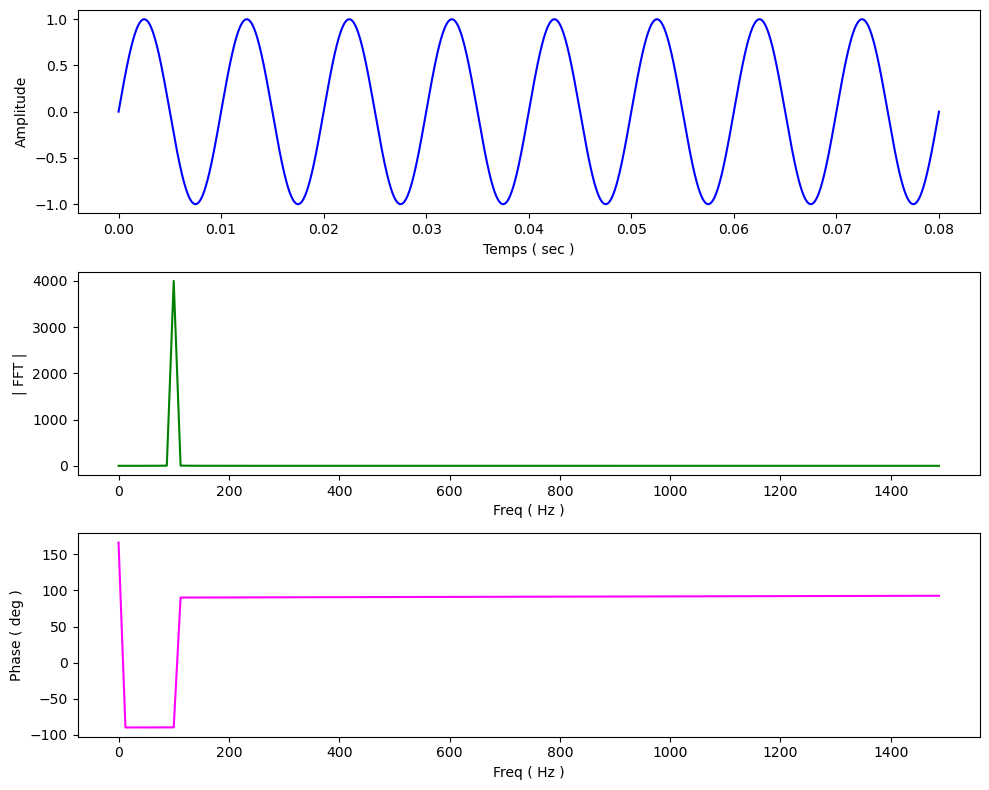

In [36]:
FFT1 = Fourrier_Transform("100 ", )
FFT1.transform()
FFT1.plot()

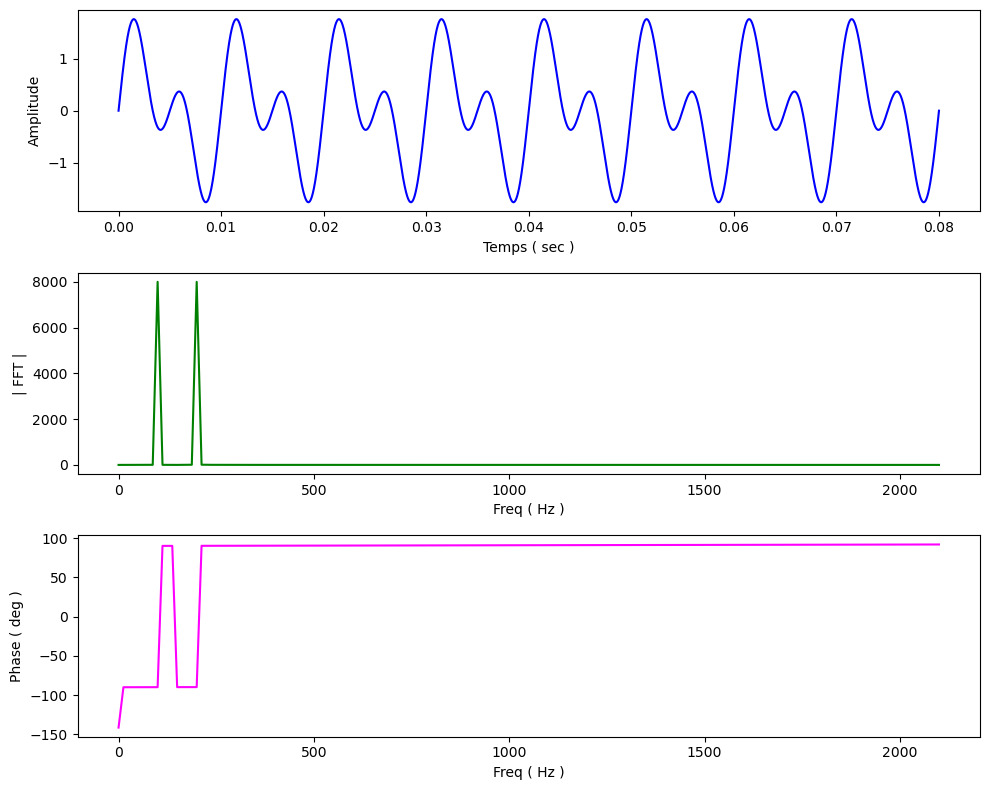

In [37]:
FFT = Fourrier_Transform(" 100 200",)
FFT.transform()
FFT.plot()

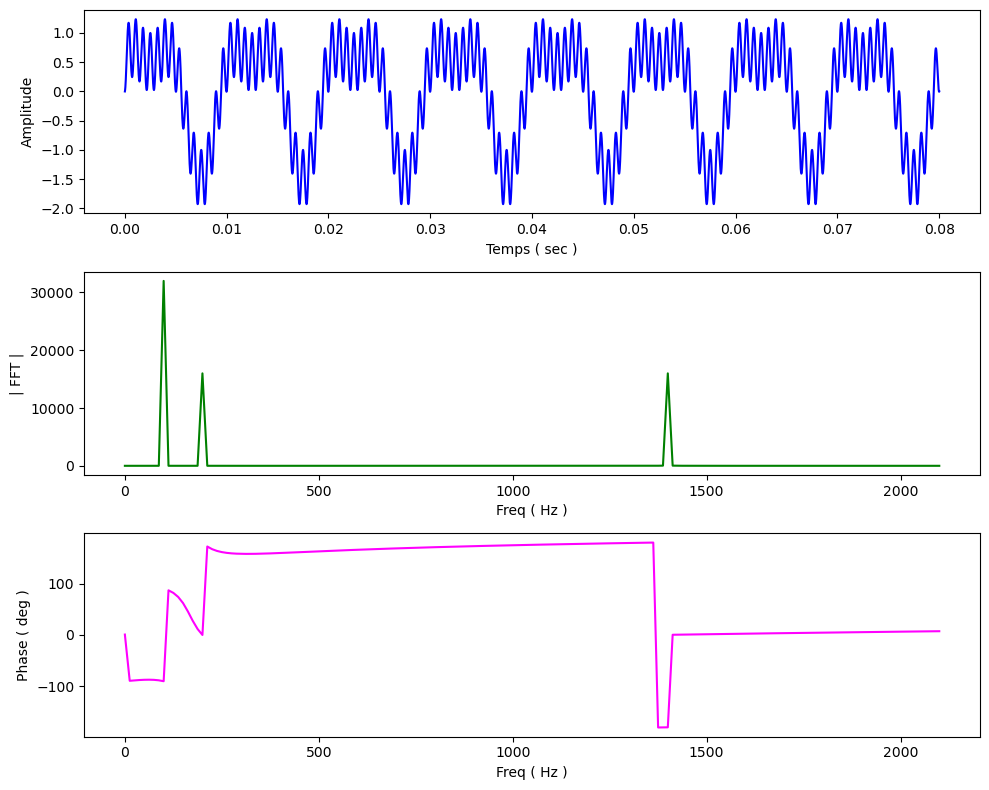

In [38]:
FFT = Fourrier_Transform("100 600*800", )
FFT.transform()
FFT.plot()

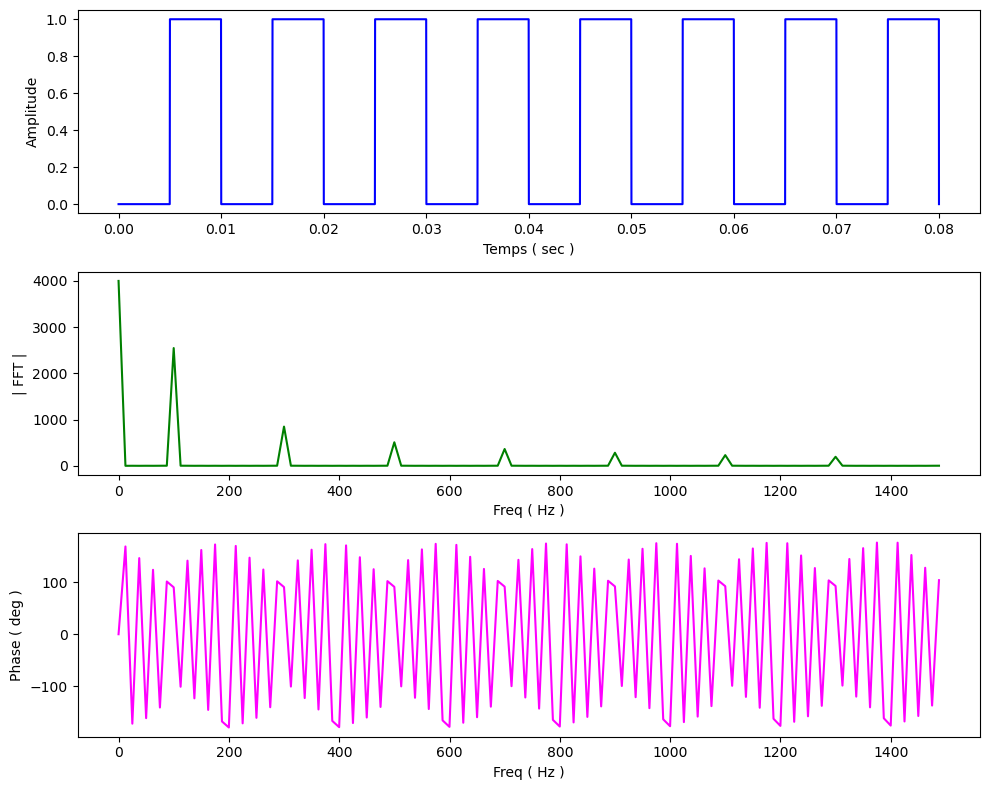

In [39]:
FFT = Fourrier_Transform("100", 'carré')
FFT.transform()
FFT.plot()

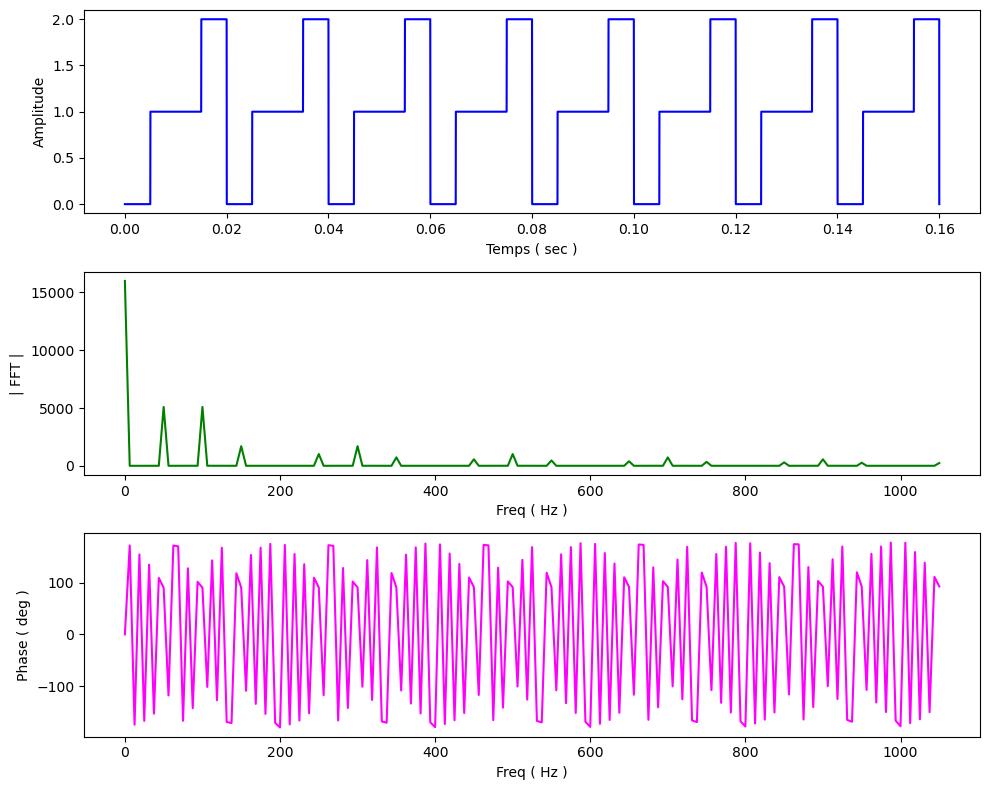

In [40]:
FFT = Fourrier_Transform("100 50", 'carré')
FFT.transform()
FFT.plot()

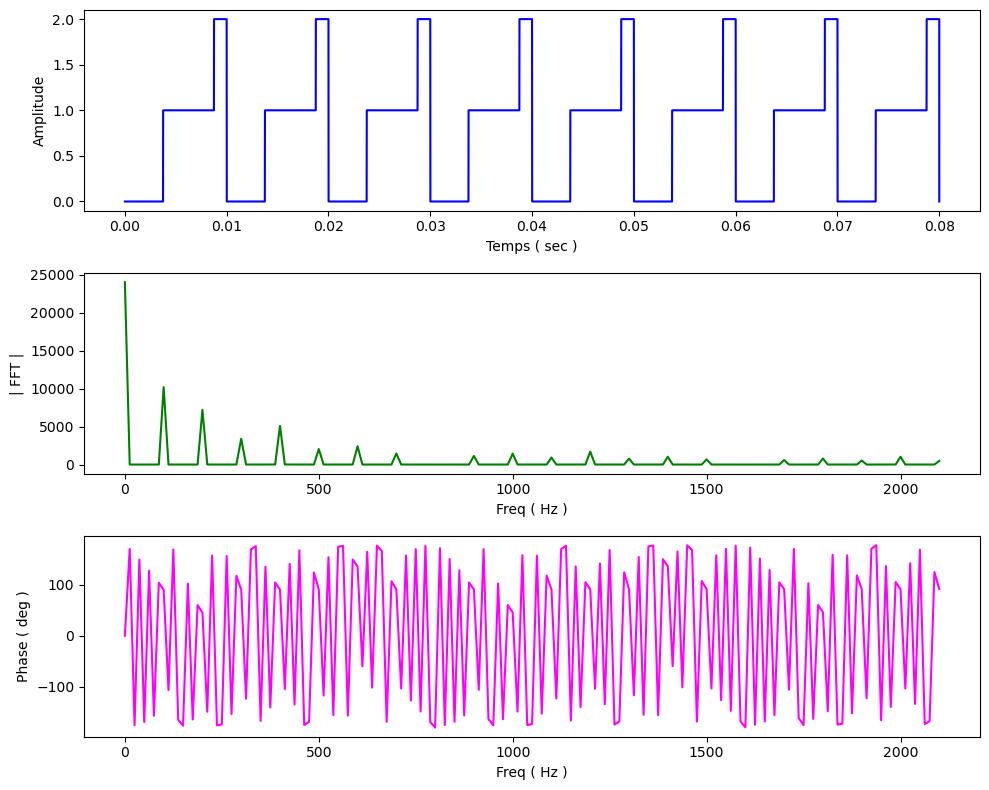

In [41]:
FFT = Fourrier_Transform("100 400*200", 'carré')
FFT.transform()
FFT.plot()

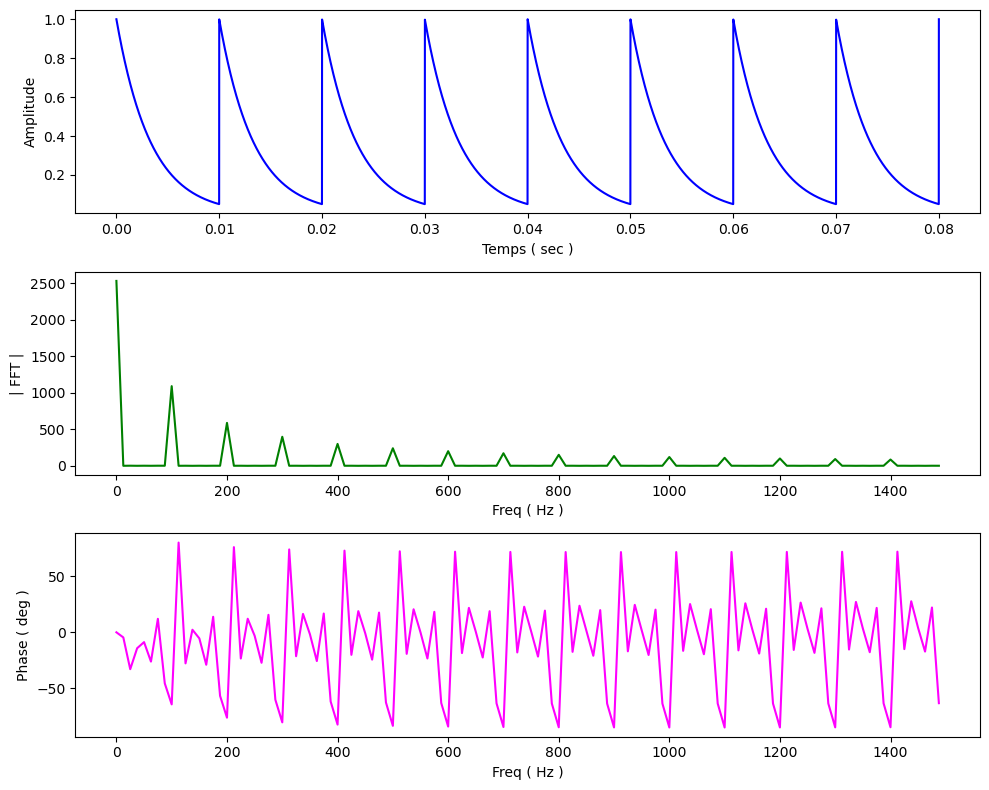

In [42]:
FFT = Fourrier_Transform("100", 'neg_exp')
FFT.transform()
FFT.plot()

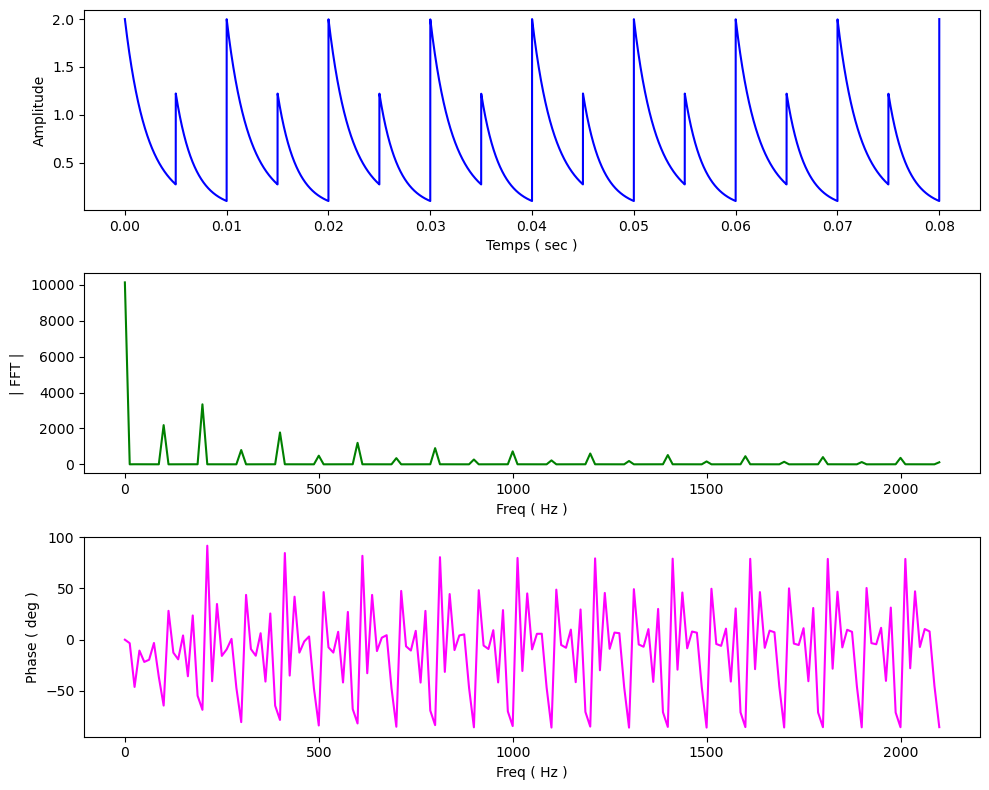

In [43]:
FFT = Fourrier_Transform("100 200", 'neg_exp')
FFT.transform()
FFT.plot()

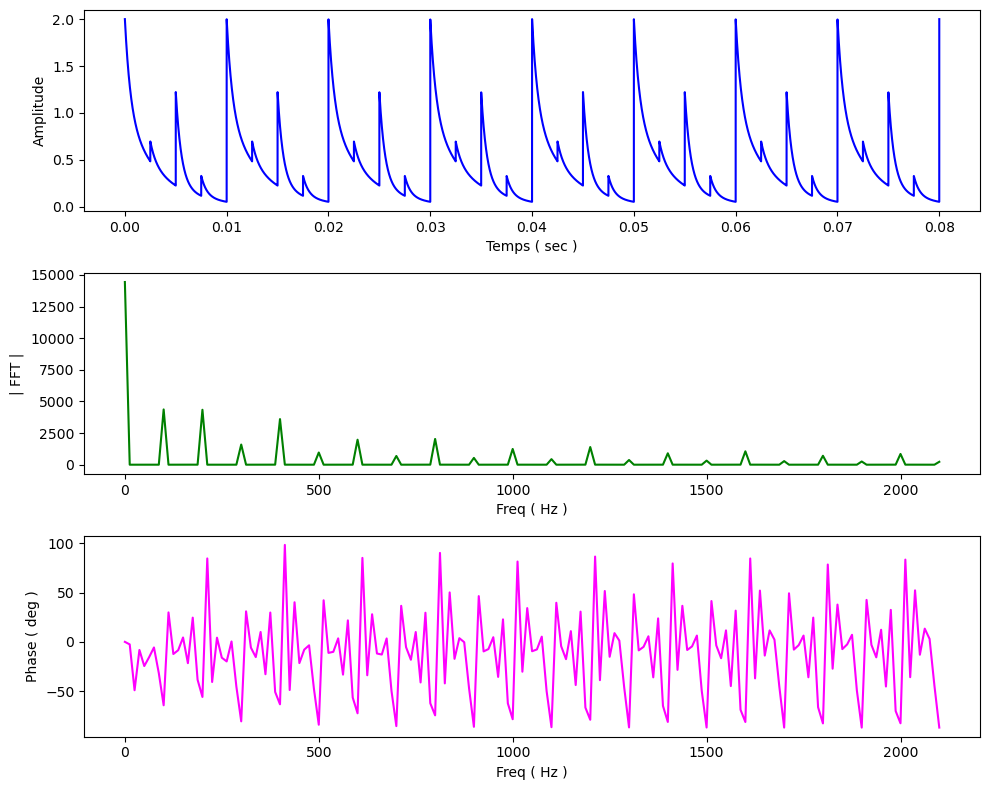

In [44]:
FFT = Fourrier_Transform("   100 200*400", 'neg_exp')
FFT.transform()
FFT.plot()

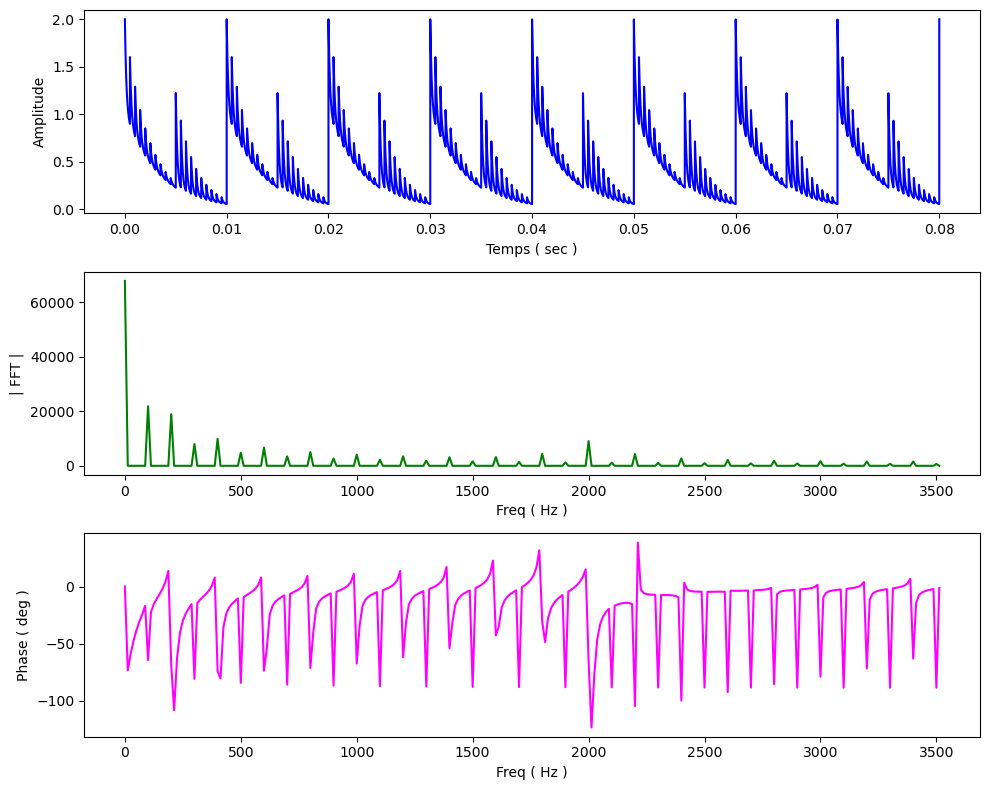

In [45]:
FFT = Fourrier_Transform("  100 200*2000  ", 'neg_exp')
FFT.transform()
FFT.plot()

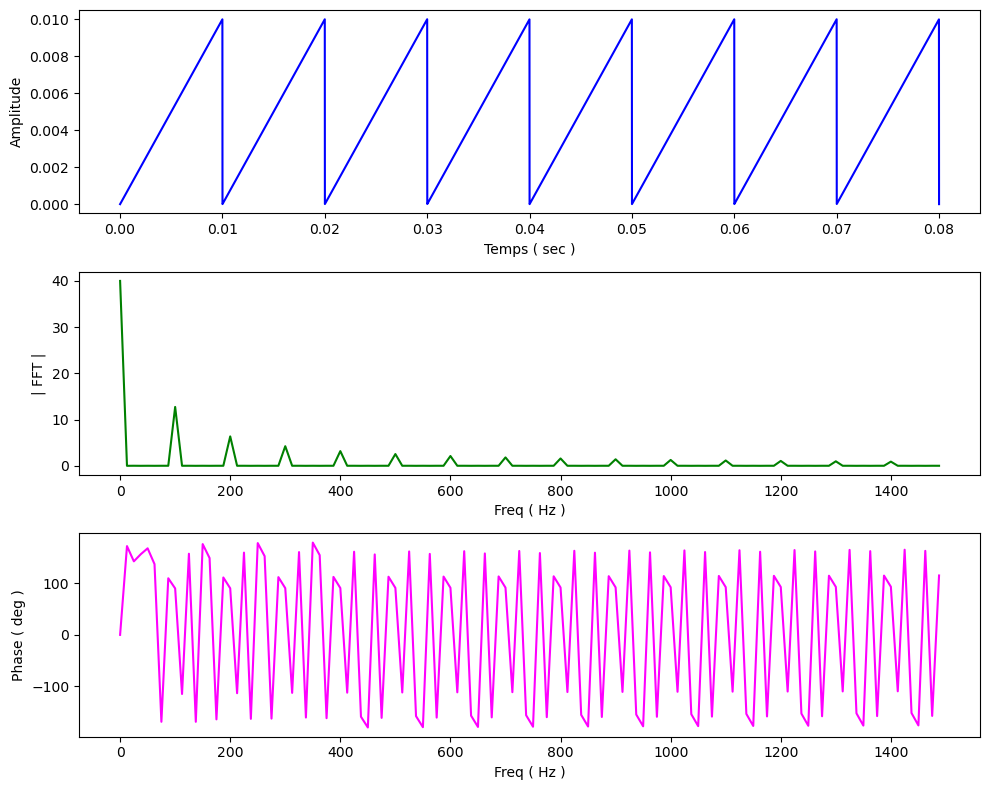

In [46]:
FFT = Fourrier_Transform("100", 'triangle')
FFT.transform()
FFT.plot()

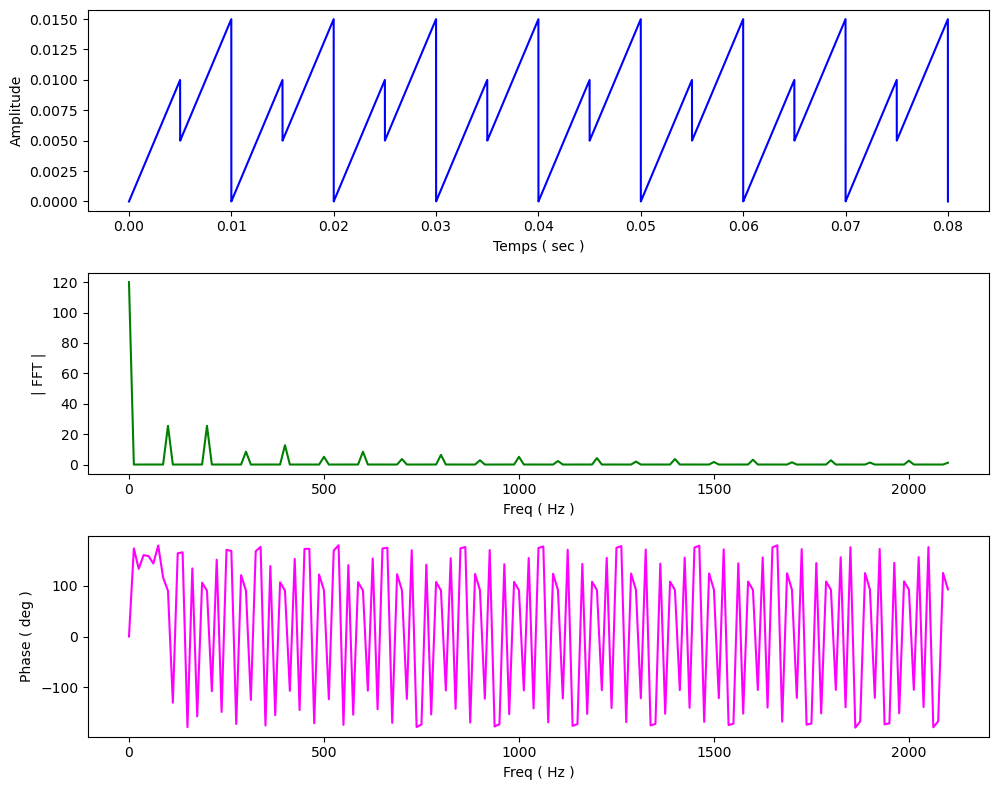

In [47]:
FFT = Fourrier_Transform("100 200  ", 'triangle')
FFT.transform()
FFT.plot()

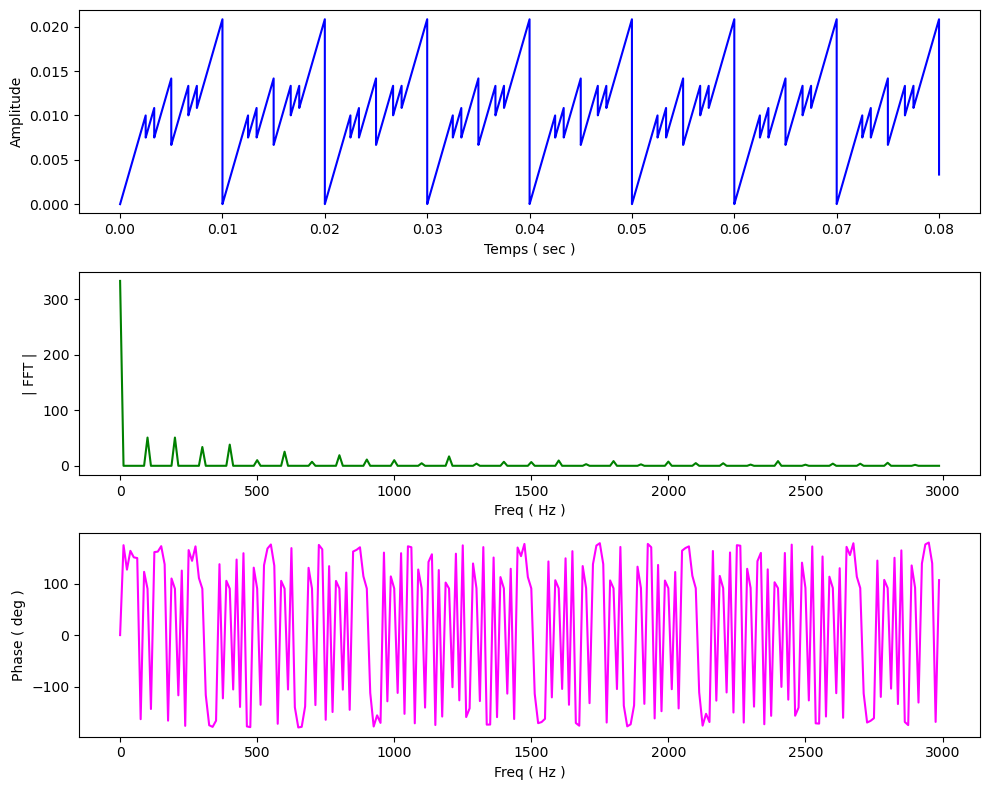

In [48]:
FFT = Fourrier_Transform("100 200 300 400", 'triangle')
FFT.transform()
FFT.plot()

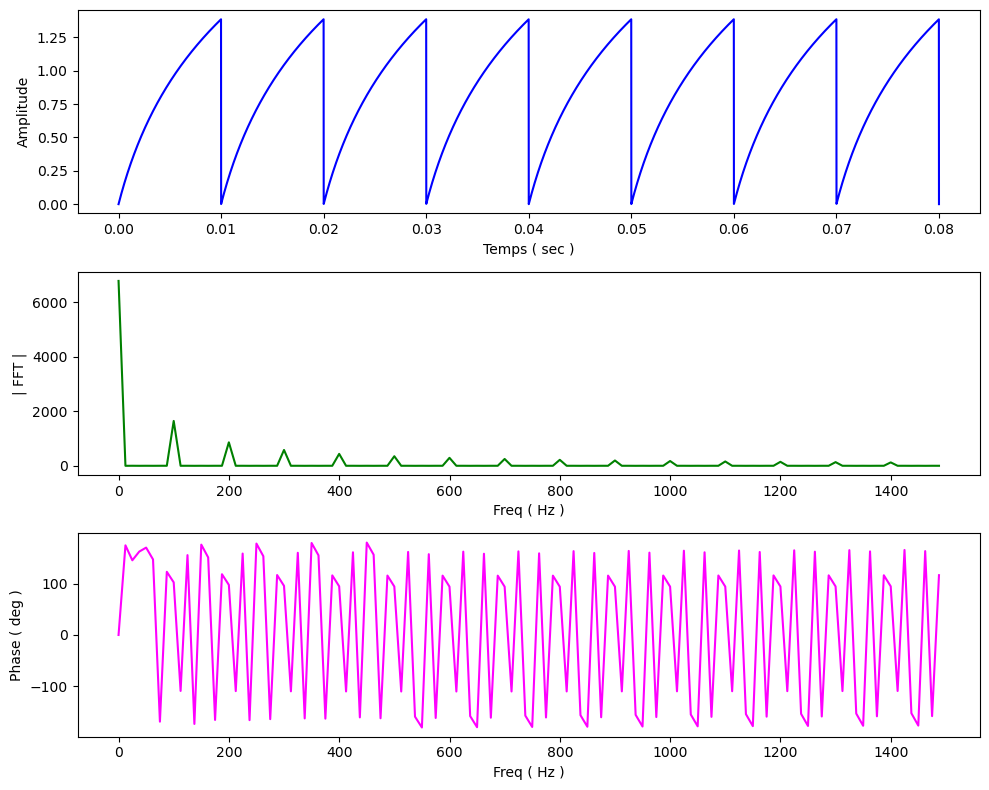

In [49]:
FFT = Fourrier_Transform("100", lambda x : np.log(x+1) )
FFT.transform()
FFT.plot()

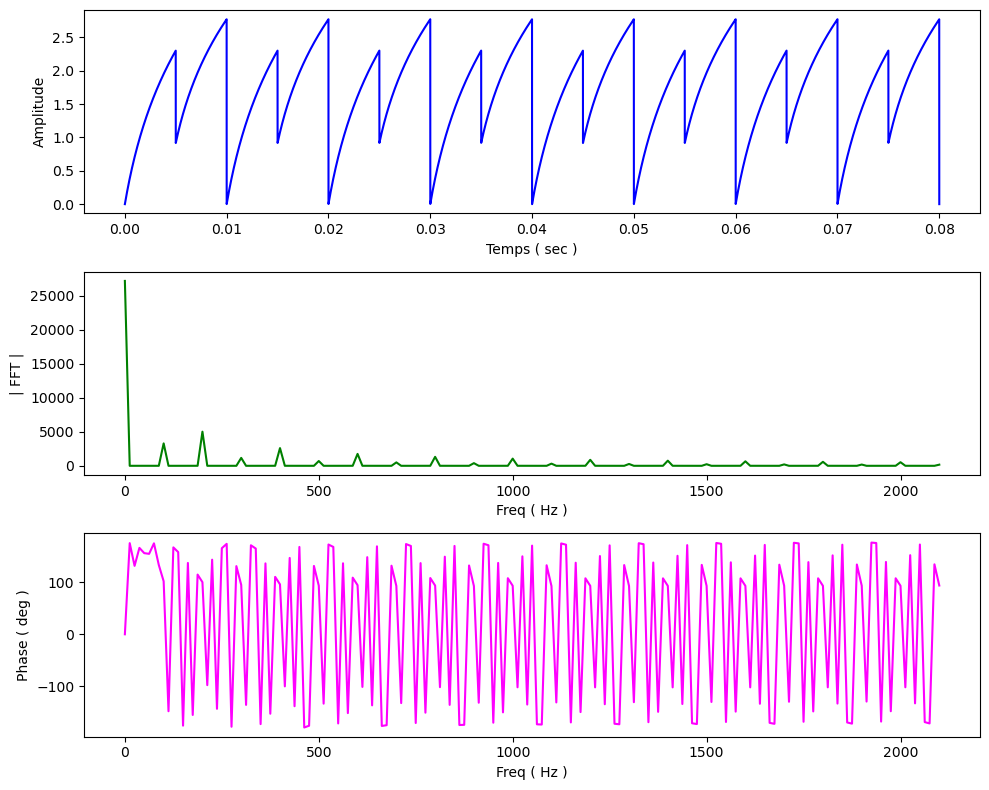

In [50]:
FFT = Fourrier_Transform("100 200    ", lambda x : np.log(x+1) )
FFT.transform()
FFT.plot()

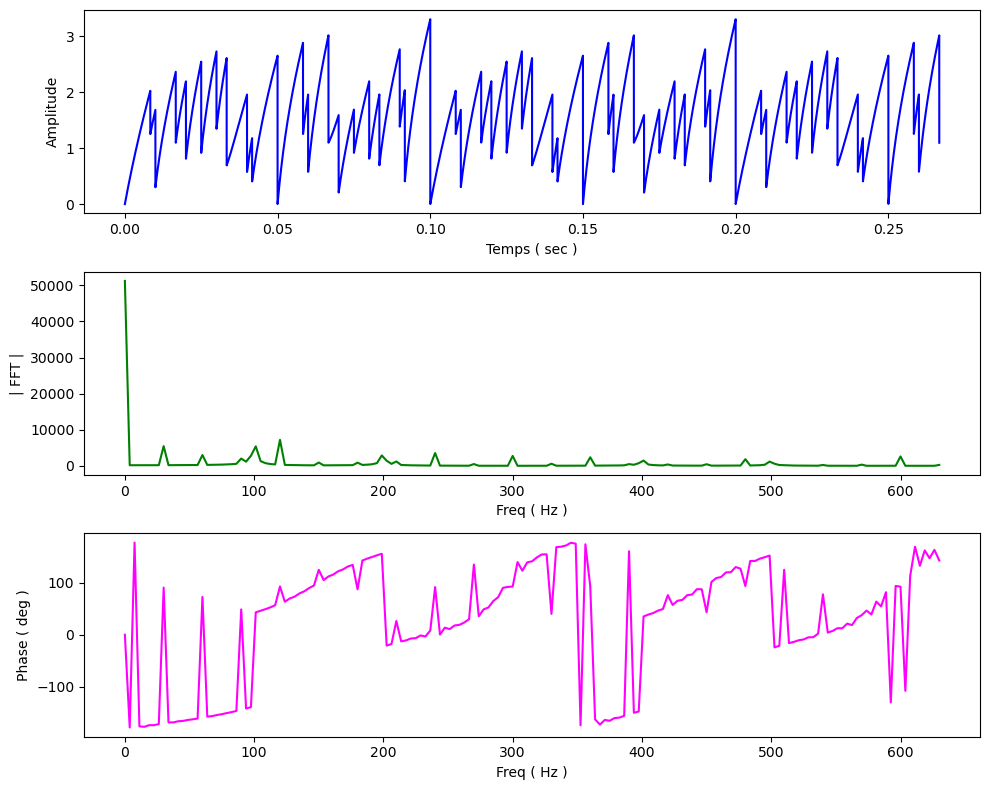

In [51]:
FFT = Fourrier_Transform(" 100 120*30", lambda x : np.log(x+1) )
FFT.transform()
FFT.plot()

# <strong> À vous de jouer à présent, J'espère que ce Notebook vous sera d'une grande utilité.
    la balle est dans votre camp, amusez vous bien ! ! ! ! 

---

- ## <strong> Authors </strong>

 #### <ul> <p> - <strong><a href="https://www.linkedin.com/in/brice-kengni-zanguim/" target="_blank">Brice KENGNI ZANGUIM :</a> </strong></p> <ul> Artificial Intelligence Engeneer at home and holds a PhD in Nano-physic. His research focused on using <strong>Machine Learning, Deep Learning, Signal Processing, Natural langage Processing, Computer Vision and so one</strong> to figure out how the world behave and impact human cognition. Brice KENGNI ZANGUIM has been working at home on mastering his own AI projects in many domains while seeking for a position in a company. </ul></ul>


---

- ## <strong> Other Contributors </strong>

#### <ul>None</ul>

---

- ## <strong> Change Log </strong>

|  Date (DD-MM-YYYY) |  Version | Changed By  |  Change Description |  Purpose  |
|---|---|---|---|---|
| 10- 03 - 2023 | 1.0 | Brice KENGNI ZANGUIM | Updated the file | Mem,save |
|-|-|-|-|
|   |   |   |   |   |

### <h3 align="center"> © BKZ Corporation 2023. All rights reserved. <h3/>
---